<a href="https://colab.research.google.com/github/RanjKsan/Cyberbullying-detection-using-Transformer-model-and-XAI/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enhancing Cyberbullying Detection with Explainable AI: Leveraging Transformer Models for Transparent Insights

1. Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
import nltk
from wordcloud import WordCloud

In [ ]:
#Loading the dataset
file_path = "/kaggle/input/cyberbullying-tweets/cyberbullying_tweets.csv"  # Adjust the file path if necessary
df = pd.read_csv(file_path)

In [ ]:
#Undertsanding Dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None

First few rows of the dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [ ]:
#Understanding the distribution
distribution = df['cyberbullying_type'].value_counts()
percentage_distribution = (distribution / len(df)) * 100

print("\nDistribution of Cyberbullying Types:")
print(distribution)
print("\nPercentage Distribution of Cyberbullying Types:")
print(percentage_distribution)


Distribution of Cyberbullying Types:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

Percentage Distribution of Cyberbullying Types:
cyberbullying_type
religion               16.770108
age                    16.757527
gender                 16.717689
ethnicity              16.692527
not_cyberbullying      16.658978
other_cyberbullying    16.403170
Name: count, dtype: float64


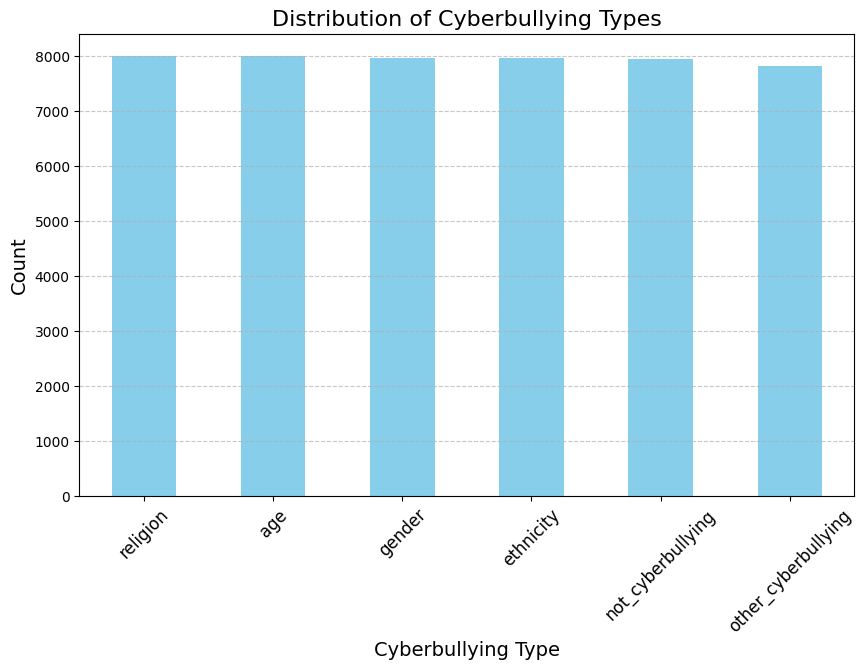

In [ ]:
#Understanding the distribution with the help of plots
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cyberbullying Types', fontsize=16)
plt.xlabel('Cyberbullying Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 36


In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
tweet_text            0
cyberbullying_type    0
dtype: int64


In [ ]:
#Analysing the lenght of the text
df['text_length'] = df['tweet_text'].apply(len)
text_length_stats = df['text_length'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print("\nText Length Statistics (including percentiles):")
print(text_length_stats)


Text Length Statistics (including percentiles):
count    47692.000000
mean       136.253229
std         85.226899
min          1.000000
25%         78.000000
50%        124.000000
75%        180.000000
90%        269.000000
95%        277.000000
99%        284.000000
max       5018.000000
Name: text_length, dtype: float64


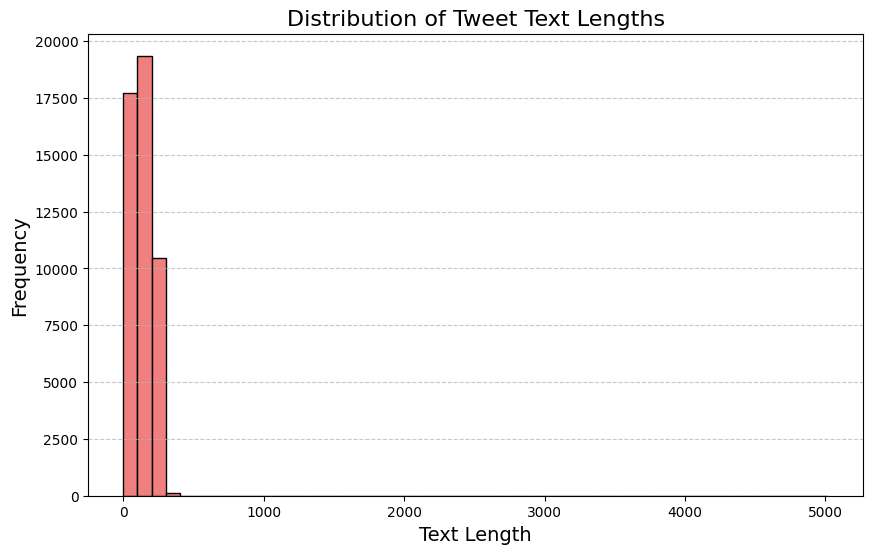

In [ ]:
#understanding the lenght of the text using plots
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Tweet Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Downloading the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Cleaning the text
stop_words = set(stopwords.words('english'))
all_words = []

for tweet in df['tweet_text']:
    words = [word.lower() for word in tweet.split() if word.lower() not in stop_words and word.isalpha()]
    all_words.extend(words)

In [ ]:
#Frequency count
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

print("\nTop 20 Most Common Words:")
print(most_common_words)


Top 20 Most Common Words:
[('school', 7073), ('like', 5618), ('fuck', 5219), ('dumb', 5145), ('high', 5011), ('bullied', 4382), ('rt', 4202), ('people', 4122), ('u', 3915), ('rape', 3515), ('gay', 3220), ('one', 3143), ('bully', 2948), ('nigger', 2859), ('get', 2810), ('ass', 2637), ('girls', 2506), ('black', 2426), ('girl', 2390), ('jokes', 2217)]


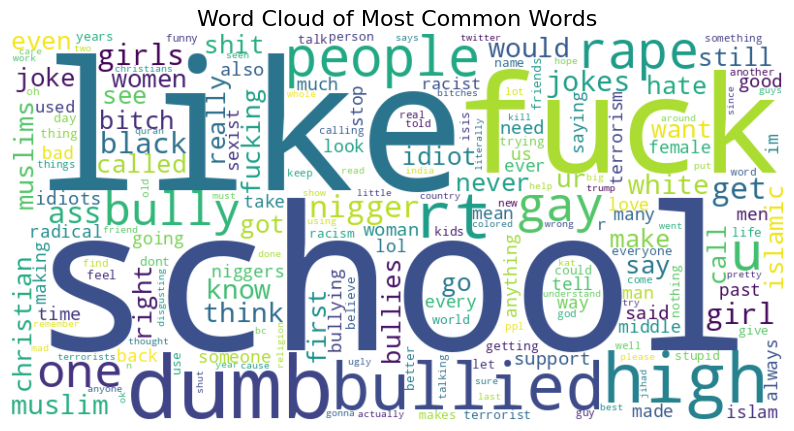

In [ ]:
#generating and plotting word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words', fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

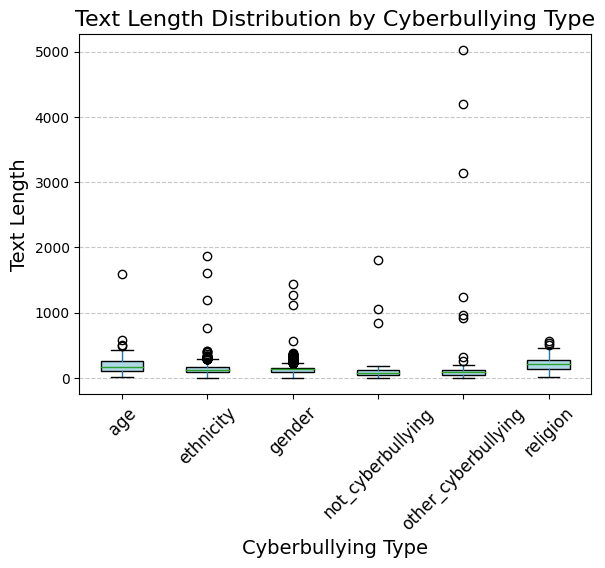

In [ ]:
# Analyze text lengths per cyberbullying type
plt.figure(figsize=(12, 8))
df.boxplot(column='text_length', by='cyberbullying_type', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Text Length Distribution by Cyberbullying Type', fontsize=16)
plt.suptitle("")  # Remove default title
plt.xlabel('Cyberbullying Type', fontsize=14)
plt.ylabel('Text Length', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

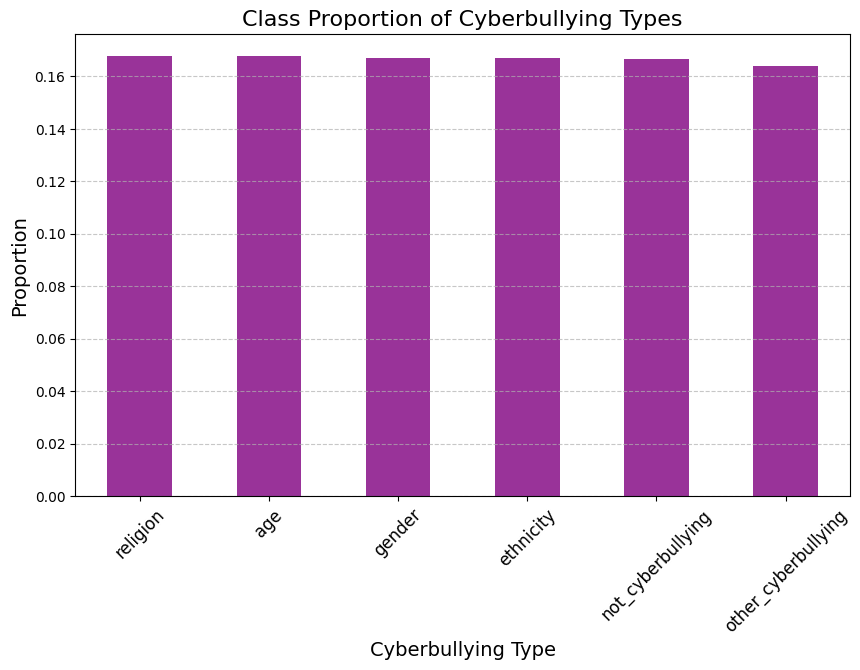

In [ ]:
# Analyze class imbalance
plt.figure(figsize=(10, 6))
df['cyberbullying_type'].value_counts(normalize=True).plot(kind='bar', color='purple', alpha=0.8)
plt.title('Class Proportion of Cyberbullying Types', fontsize=16)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Cyberbullying Type', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("\nExample Tweets from Each Class:")
for cyberbullying_type in df['cyberbullying_type'].unique():
    print(f"\nCyberbullying Type: {cyberbullying_type}")
    examples = df[df['cyberbullying_type'] == cyberbullying_type]['tweet_text'].head(3).values
    for i, tweet in enumerate(examples):
        print(f"  Example {i + 1}: {tweet}")


Example Tweets from Each Class:

Cyberbullying Type: not_cyberbullying
  Example 1: In other words #katandandre, your food was crapilicious! #mkr
  Example 2: Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc
  Example 3: @XochitlSuckkks a classy whore? Or more red velvet cupcakes?

Cyberbullying Type: gender
  Example 1: rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from
  Example 2: You never saw any celebrity say anything like this for Obama: B Maher Incest Rape 'Joke' S Colbert Gay 'joke' K Griffin beheading 'joke'
  Example 3: @ManhattaKnight I mean he's gay, but he uses gendered slurs and makes rape jokes

Cyberbullying Type: religion
  Example 1: Sudeep, did she invite him though? No right? Why are you getting worded up? You're okay with Parvesh Verma cause he speaks against Muslims but against an idiot li

2. Data Cleaning and Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Checking and removing for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
df_cleaned = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")


Number of duplicate rows: 36
Number of rows after removing duplicates: 47656


In [ ]:
#Remove Tweets Exceeding 280 Characters
# Create a new column 'text_length' in a safer way
df_cleaned = df_cleaned.copy()  # Make a copy to avoid the warning
df_cleaned['text_length'] = df_cleaned['tweet_text'].apply(len)

# Filter tweets with <= 280 characters
df_cleaned = df_cleaned[df_cleaned['text_length'] <= 280]

# Print the number of rows after filtering
print(f"Number of rows after filtering tweets > 280 characters: {len(df_cleaned)}")


Number of rows after filtering tweets > 280 characters: 46953


In [ ]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Define text preprocessing function with SpaCy
def preprocess_text_spacy(text):
    import re
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(filtered_tokens)

# Test the new function
sample_text = "This is a sample tweet! Check out https://example.com #sample @user"
print(f"Original: {sample_text}")
print(f"Cleaned: {preprocess_text_spacy(sample_text)}")


Original: This is a sample tweet! Check out https://example.com #sample @user
Cleaned: sample tweet check


In [ ]:
import re

# Define a basic text preprocessing function
def preprocess_text_basic(text):
    text = text.lower()  # Converts all characters to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Removes all characters except letters, numbers, and whitespace
    text = re.sub(r'\s+', ' ', text)  # Replaces multiple spaces with a single space
    return text.strip()
# Apply preprocessing using Pandas' vectorized methods
df_cleaned['cleaned_text'] = df_cleaned['tweet_text'].str.lower() \
    .str.replace(r'[^\w\s]', '', regex=True) \
    .str.replace(r'\s+', ' ', regex=True).str.strip()



In [ ]:
print("Sample cleaned text:")
print(df_cleaned[['tweet_text', 'cleaned_text']].head())

Sample cleaned text:
                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                        cleaned_text  
0  in other words katandandre your food was crapi...  
1  why is aussietv so white mkr theblock imaceleb...  
2  xochitlsuckkks a classy whore or more red velv...  
3  jason_gio meh p thanks for the heads up but no...  
4  rudhoeenglish this is an isis account pretendi...  


In [ ]:
print("Sample cleaned text:")
print(df_cleaned[['tweet_text', 'cleaned_text']].head())

Sample cleaned text:
                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                        cleaned_text  
0  in other words katandandre your food was crapi...  
1  why is aussietv so white mkr theblock imaceleb...  
2  xochitlsuckkks a classy whore or more red velv...  
3  jason_gio meh p thanks for the heads up but no...  
4  rudhoeenglish this is an isis account pretendi...  


In [ ]:
df_cleaned.head()

,tweet_text,cyberbullying_type,text_length,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,in other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,xochitlsuckkks a classy whore or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,jason_gio meh p thanks for the heads up but no...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,rudhoeenglish this is an isis account pretendi...


In [ ]:
# Check for empty or null cleaned text
empty_cleaned_text = df_cleaned[df_cleaned['cleaned_text'].str.strip() == '']
print(f"Number of rows with empty cleaned text: {len(empty_cleaned_text)}")
df_cleaned = df_cleaned[df_cleaned['cleaned_text'].str.strip() != '']
print(f"Final dataset size after cleaning: {len(df_cleaned)}")

Number of rows with empty cleaned text: 9
Final dataset size after cleaning: 46944


3. Data Splitting (Training/Validation/Test sets).

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Define feature (X) and target (y) (Training Set: 70% of the data , Validation Set: 15% of the data, Test Set: 15% of the data)
X = df_cleaned['cleaned_text']
y = df_cleaned['cyberbullying_type']

# Perform an 85-15 split to first separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Perform a 70-15 split on the remaining data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# Verify the size of each split
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 32859
Validation set size: 7043
Test set size: 7042


In [ ]:
# Define a function to check class distribution
def check_class_distribution(y, dataset_name):
    print(f"\nClass distribution in {dataset_name}:")
    print(y.value_counts(normalize=True) * 100)

# Check class distribution in each set
check_class_distribution(y_train, "Training set")
check_class_distribution(y_val, "Validation set")
check_class_distribution(y_test, "Test set")



Class distribution in Training set:
cyberbullying_type
not_cyberbullying      16.899480
ethnicity              16.747314
gender                 16.689491
age                    16.649928
other_cyberbullying    16.637755
religion               16.376031
Name: proportion, dtype: float64

Class distribution in Validation set:
cyberbullying_type
not_cyberbullying      16.896209
ethnicity              16.754224
gender                 16.683232
age                    16.654835
other_cyberbullying    16.640636
religion               16.370865
Name: proportion, dtype: float64

Class distribution in Test set:
cyberbullying_type
not_cyberbullying      16.898608
ethnicity              16.742403
gender                 16.685601
age                    16.657200
other_cyberbullying    16.642999
religion               16.373189
Name: proportion, dtype: float64


In [ ]:
# Save the splits as CSV files (optional)
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Datasets saved successfully.")


Datasets saved successfully.


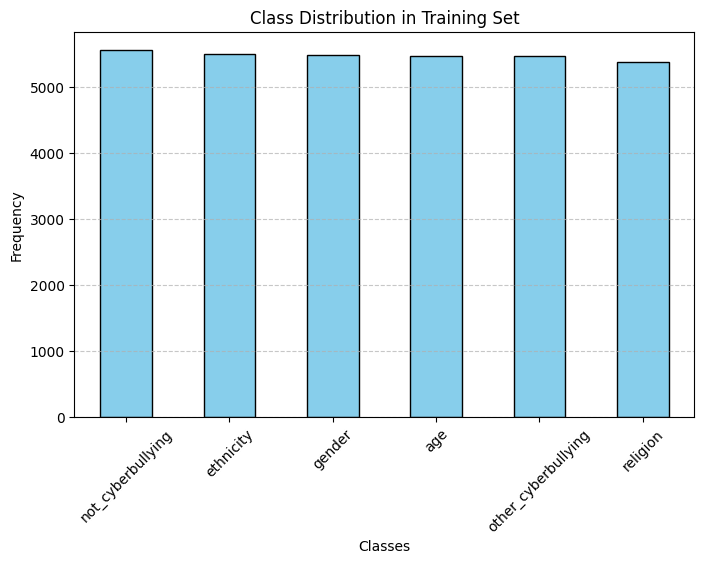

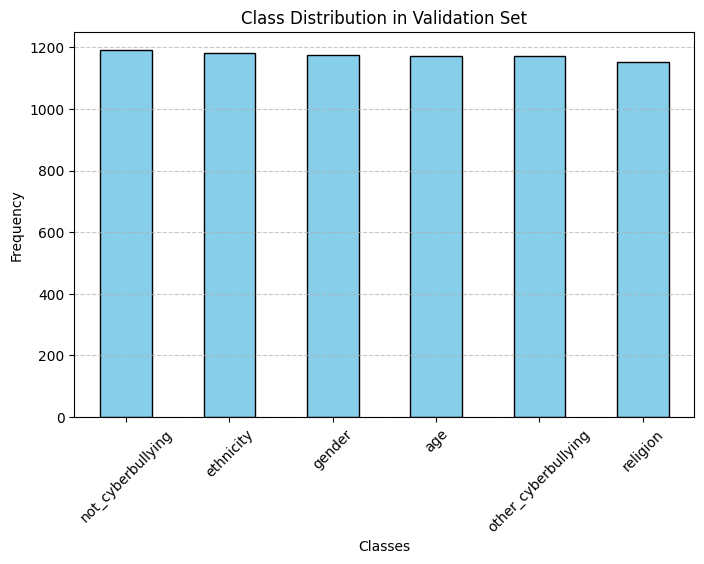

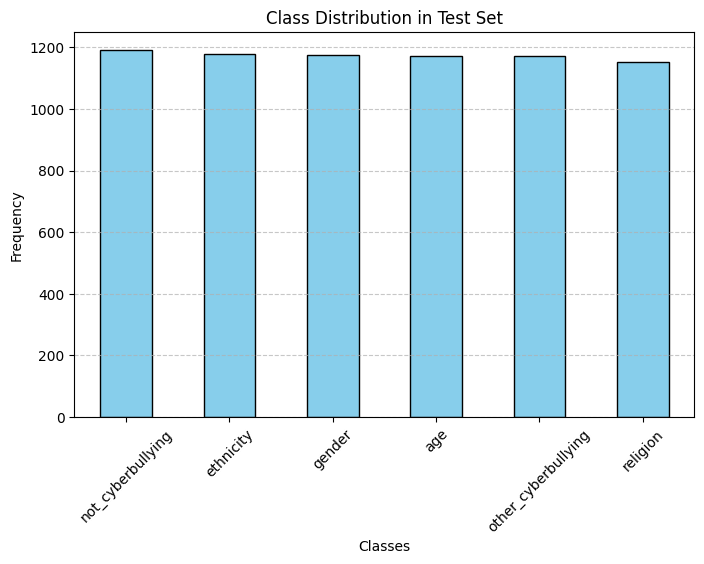

In [ ]:
#Visualize Class Distribution in Each Split
def plot_class_distribution(y, dataset_name):
    class_counts = y.value_counts()
    class_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
    plt.title(f"Class Distribution in {dataset_name}")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot class distribution for each dataset
plot_class_distribution(y_train, "Training Set")
plot_class_distribution(y_val, "Validation Set")
plot_class_distribution(y_test, "Test Set")

4. DL Model

Understandng the data set with one DL Model(RNN)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Tokenization
vocab_size = 20000  # Max number of unique words to keep
max_length = 100    # Max length of each sequence
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'

# Initialize and fit the tokenizer on training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Verify shapes
print(f"Training set shape: {X_train_padded.shape}")
print(f"Validation set shape: {X_val_padded.shape}")
print(f"Test set shape: {X_test_padded.shape}")


Training set shape: (32859, 100)
Validation set shape: (7043, 100)
Test set shape: (7042, 100)


In [ ]:
#Building RNN (Bidirectional LSTM)
# Number of output classes
num_classes = len(y.unique())

# Build the model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),  # RNN layer (Bidirectional LSTM)
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Convert target labels to numeric if not already done
label_mapping = {label: idx for idx, label in enumerate(y_train.unique())}
y_train_mapped = y_train.map(label_mapping)
y_val_mapped = y_val.map(label_mapping)

# Train the model
history = model.fit(
    X_train_padded,
    y_train_mapped,
    validation_data=(X_val_padded, y_val_mapped),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5612 - loss: 1.0187 - val_accuracy: 0.7872 - val_loss: 0.4745
Epoch 2/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8194 - loss: 0.4154 - val_accuracy: 0.8266 - val_loss: 0.4544
Epoch 3/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8754 - loss: 0.3351 - val_accuracy: 0.8271 - val_loss: 0.4415
Epoch 4/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9095 - loss: 0.2483 - val_accuracy: 0.8221 - val_loss: 0.5039
Epoch 5/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9202 - loss: 0.2175 - val_accuracy: 0.8139 - val_loss: 0.5986
Epoch 6/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9284 - loss: 0.1875 - val_accuracy: 0.8153 - val_loss: 0.6090
Epoch 7/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9365 - loss: 0.1594 - val_accuracy: 0.8126 - val_loss: 0.7094
Epoch 8/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9382 -

In [ ]:
# Map test labels to numeric
y_test_mapped = y_test.map(label_mapping)

# Evaluate the model
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_mapped, y_pred_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test_mapped, y_pred_classes))


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 81.30%
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1190
           1       0.58      0.65      0.61      1172
           2       0.93      0.95      0.94      1153
           3       0.97      0.96      0.97      1173
           4       0.96      0.97      0.97      1179
           5       0.84      0.86      0.85      1175

    accuracy                           0.81      7042
   macro avg       0.81      0.81      0.81      7042
weighted avg       0.81      0.81      0.81      7042



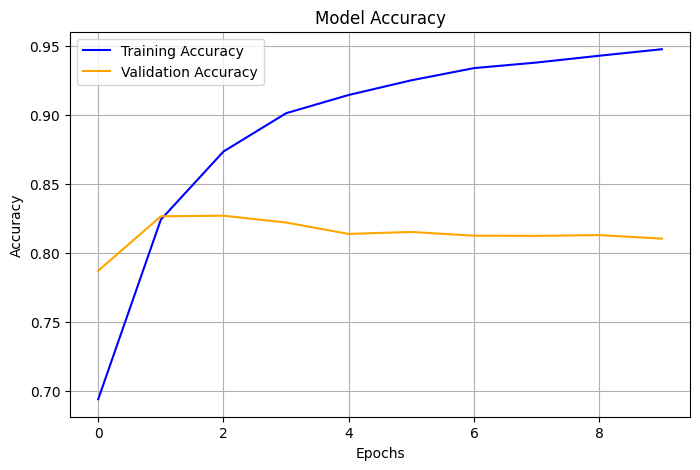

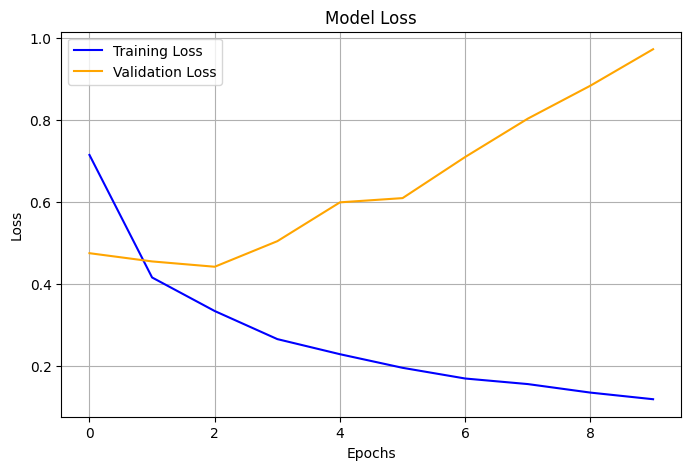

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


5.Explainable AI for Each Transfomer Model

5.1 Using LIME + BERT and SHAP + BERT